In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-test-scores-of-students/test_scores.csv


In [2]:
#import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("/kaggle/input/predict-test-scores-of-students/test_scores.csv") #load the dataset

In [4]:
df.head(10) #show the top 10 values on given dataset

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
5,ANKYI,Urban,Non-public,6OL,Standard,20.0,7YZO8,Female,Does not qualify,66.0,74.0
6,ANKYI,Urban,Non-public,6OL,Standard,20.0,9KMZD,Male,Does not qualify,63.0,75.0
7,ANKYI,Urban,Non-public,6OL,Standard,20.0,9USQK,Female,Does not qualify,63.0,72.0
8,ANKYI,Urban,Non-public,6OL,Standard,20.0,CS5QP,Male,Does not qualify,64.0,77.0
9,ANKYI,Urban,Non-public,6OL,Standard,20.0,D6HT8,Female,Does not qualify,61.0,72.0


In [5]:
df.info() #info() used for print a concise data summary of the given dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [6]:
df.isnull().sum()  #it's used for checking the missing values

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [7]:
df.describe() 

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [8]:
df['school_type'].value_counts() #count the school types in given dataset

Public        1582
Non-public     551
Name: school_type, dtype: int64

In [9]:
df['school_setting'].value_counts() 

Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64

In [10]:
#checking the outliers

uv = np.percentile(df['posttest'], [99])[0]
print(uv)

96.0


In [11]:
df.posttest[(df.posttest > uv)] 

864      97.0
870      99.0
899      98.0
901      99.0
902     100.0
903     100.0
904      98.0
905     100.0
907     100.0
908     100.0
909     100.0
910      98.0
911     100.0
914      98.0
915     100.0
1476     98.0
1483     99.0
1487     98.0
1492     97.0
1500     97.0
Name: posttest, dtype: float64

In [12]:
df.columns #print the columns in a given DataFrame

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

In [13]:
#remove the unwanted columns
df = df.drop("classroom", axis = 1)
df = df.drop("gender", axis = 1)

In [14]:
df.head()

,school,school_setting,school_type,teaching_method,n_student,student_id,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,2FHT3,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,3JIVH,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,3XOWE,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,556O0,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,74LOE,Does not qualify,64.0,76.0


DATA VISUALIZATION

<AxesSubplot:xlabel='school_setting', ylabel='count'>

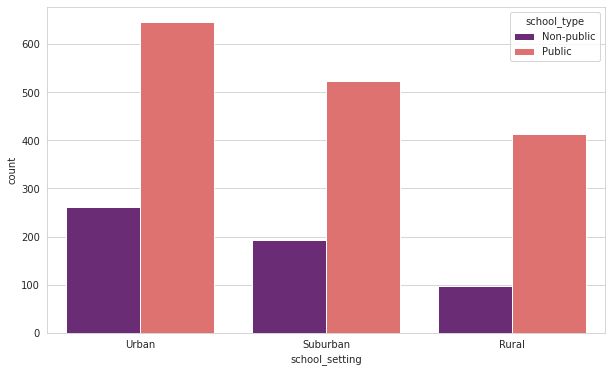

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df['school_setting'], hue = df['school_type'], palette="magma")

<AxesSubplot:xlabel='teaching_method', ylabel='count'>

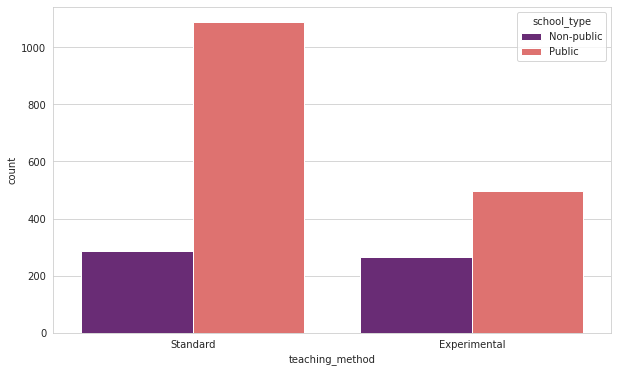

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df["teaching_method"], hue = df["school_type"], palette="magma")

<AxesSubplot:xlabel='n_student', ylabel='posttest'>

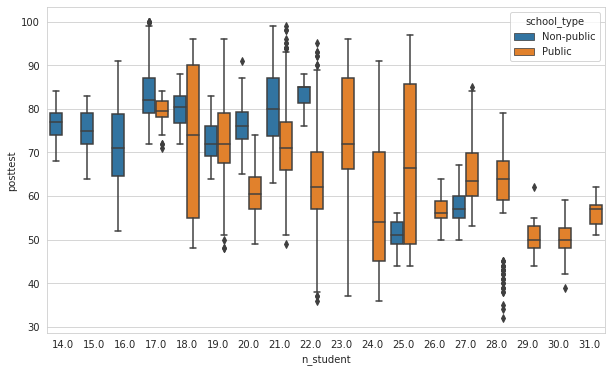

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = df["n_student"], y = df['posttest'], hue = df["school_type"])

<AxesSubplot:xlabel='n_student', ylabel='pretest'>

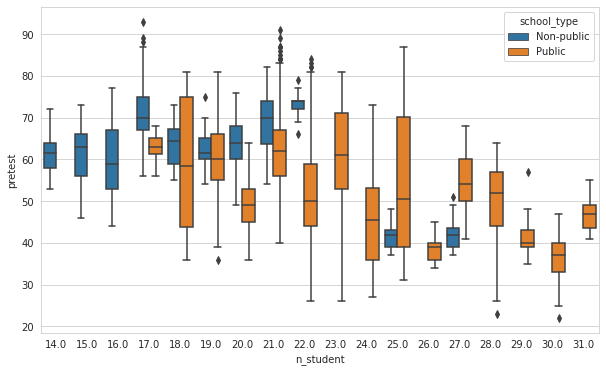

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = df['n_student'], y = df['pretest'], hue = df['school_type'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


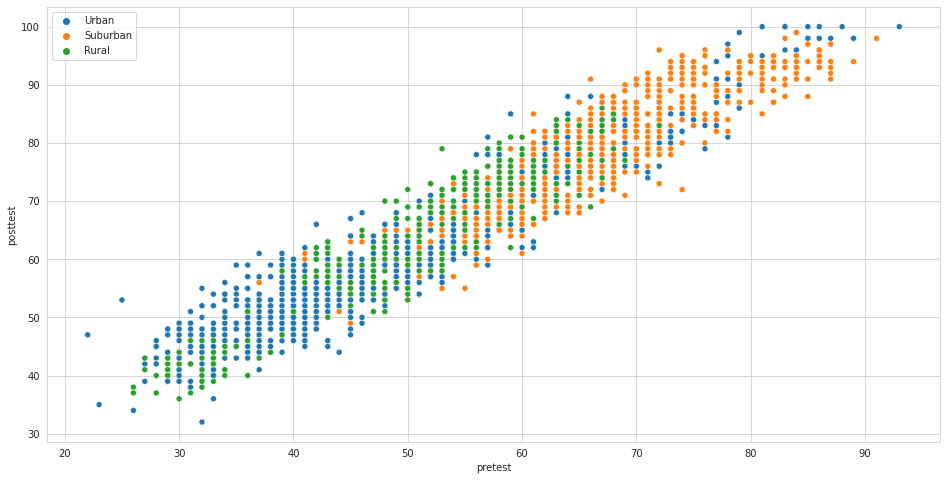

In [19]:
plt.figure(figsize=(16, 8))
sns.scatterplot(df['pretest'], df['posttest'], hue=df['school_setting'])
plt.legend()

In [20]:
pretest_m = df['pretest'].describe()
posttest_m = df['posttest'].describe()

avg_mean = posttest_m - pretest_m
print(avg_mean["mean"])

12.146272855133617


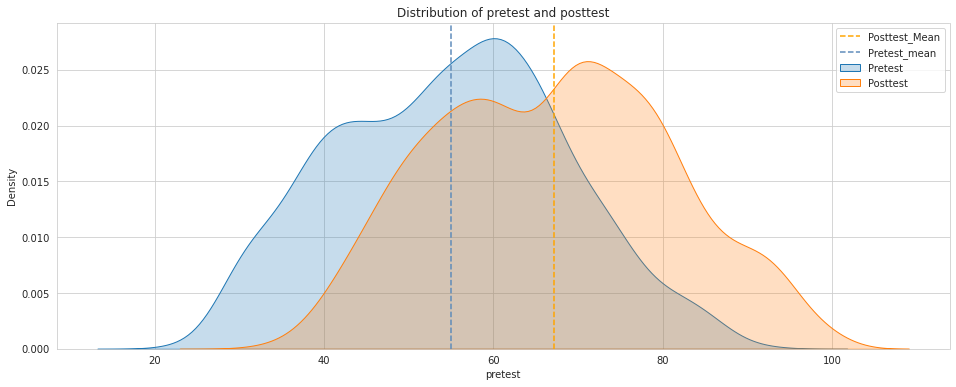

In [21]:
plt.figure(figsize=(16, 6))

ax = sns.kdeplot(df["pretest"], shade = True, fill=True, label="Pretest")
ax = sns.kdeplot(df["posttest"], shade = True, fill = True, label = "Posttest")

plt.axvline(posttest_m['mean'], linestyle = "--", color = "orange", label = "Posttest_Mean")
plt.axvline(pretest_m["mean"], linestyle="--", color = "#5D8BBA", label = "Pretest_mean")

plt.title("Distribution of pretest and posttest")
plt.legend()
plt.show()

In [22]:
x = df.drop("posttest", axis=1) #seprate the independent values in given dataframe
y = df['posttest']  #seprate the dependent values in the given dataframw

x = pd.get_dummies(x)  #fill the dummy values in independent features
x.head()

,n_student,pretest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,school_GOKXL,...,student_id_ZTROF,student_id_ZU75P,student_id_ZUFG3,student_id_ZVCQ8,student_id_ZVM0Q,student_id_ZX8TB,student_id_ZY9X3,student_id_ZZGRB,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,20.0,66.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,20.0,64.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,20.0,61.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,20.0,64.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
#Import the Required machine-learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [25]:
X_train.shape

(1493, 2167)

In [26]:
X_test.shape

(640, 2167)

In [27]:
y_train.shape

(1493,)

In [28]:
y_test.shape

(640,)

In [29]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.fit_transform(X_test)

In [30]:
X_train_s

array([[-0.20668642,  1.26702632, -0.14799597, ...,  0.        ,
         0.8840944 , -0.8840944 ],
       [-0.44351131,  0.82184014, -0.14799597, ...,  0.        ,
         0.8840944 , -0.8840944 ],
       [-1.62763576, -0.51371842, -0.14799597, ...,  0.        ,
        -1.13110093,  1.13110093],
       ...,
       [-0.20668642,  0.30245625, -0.14799597, ...,  0.        ,
         0.8840944 , -0.8840944 ],
       [-1.15398598,  1.56381712, -0.14799597, ...,  0.        ,
         0.8840944 , -0.8840944 ],
       [-0.44351131,  1.34122402, -0.14799597, ...,  0.        ,
         0.8840944 , -0.8840944 ]])

In [31]:
X_test_s

array([[ 0.09002192,  1.08863918, -0.11942811, ..., -0.03955939,
         0.83523214, -0.83523214],
       [-0.38222423,  1.30682156, -0.11942811, ..., -0.03955939,
         0.83523214, -0.83523214],
       [-0.6183473 , -0.29318258, -0.11942811, ..., -0.03955939,
         0.83523214, -0.83523214],
       ...,
       [-1.09059346,  1.52500394, -0.11942811, ..., -0.03955939,
         0.83523214, -0.83523214],
       [-1.09059346,  1.37954902, -0.11942811, ..., -0.03955939,
         0.83523214, -0.83523214],
       [ 0.56226807, -1.02045718, -0.11942811, ..., -0.03955939,
        -1.19727193,  1.19727193]])

In [32]:
rf = RandomForestRegressor(max_depth=6)
rf.fit(X_train_s, y_train)
rf_pred = rf.predict(X_test_s)

In [33]:
#rf_pred

In [34]:
dt = DecisionTreeRegressor(max_depth=6)
dt.fit(X_train_s, y_train)
dt_pred = dt.predict(X_test_s)

In [35]:
#dt_pred

In [36]:
print("mean_absolute error of random_forest model", mean_absolute_error(y_test, rf_pred))
print("mean_squared error of random_forest model: ", mean_squared_error(y_test, rf_pred))
print("r2_score of random_forest model: ", r2_score(y_test, rf_pred))

mean_absolute error of random_forest model 2.5206940597034273
mean_squared error of random_forest model:  10.058381686479716
r2_score of random_forest model:  0.950570543269352


In [37]:
print("mean_absolute error of DecisionTreeRegressor model: ", mean_absolute_error(y_test, dt_pred))
print("mean_squared error of DecisionTreeRegressor model: ", mean_squared_error(y_test, dt_pred))
print("r2_score value of DecisionTreeRegressor model: ", r2_score(y_test, dt_pred))

mean_absolute error of DecisionTreeRegressor model:  2.672110614806155
mean_squared error of DecisionTreeRegressor model:  11.642095674488614
r2_score value of DecisionTreeRegressor model:  0.9427877682182488
